<a href="https://colab.research.google.com/gist/VivekChimman/667140e97c99fe1167c3aee9a358defa/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

from tensorflow.keras.datasets import cifar10

In [ ]:
# Data has already been sorted as training and test sets
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [ ]:
# Show the first training example
print (f"Training sample: \n{train_data[0]} \n")
print (f"Training label: \n{train_labels[0]} \n")

Training sample: 
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]] 

Training label: 
[6] 



In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape


((32, 32, 3), (1,))

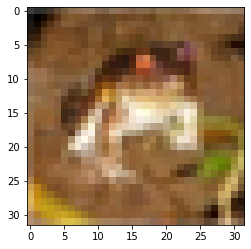

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);



In [ ]:
# Check out samples label. 
train_labels[0]

array([6], dtype=uint8)

In [ ]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
train_labels = train_labels.reshape(-1,) 
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
len(class_names)

10

Text(0.5, 1.0, 'automobile')

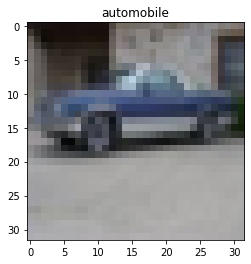

In [ ]:
#Plot an example image with it's label
index_of_choice = 10000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

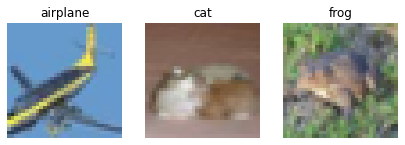

In [ ]:
  # Plot multiple random images of cifar10
  import random
  plt.figure(figsize=(7, 7))
  for i in range(3):
     ax = plt.subplot(2, 3, i+1)
     rand_index = random.choice(range(len(train_data)))
     plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
     plt.title(class_names[train_labels[rand_index]])
     plt.axis(False)
 

In [ ]:
32*32*3

3072

In [ ]:
# Check the min and max values of the training data.
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# getting our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
#check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
#cnn
tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
#dense
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(160, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
#Fit the model
norm_history = model.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4009 - accuracy: 0.4988 - val_loss: 1.1231 - val_accuracy: 0.6035
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0284 - accuracy: 0.6402 - val_loss: 0.9862 - val_accuracy: 0.6493
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8785 - accuracy: 0.6932 - val_loss: 0.9003 - val_accuracy: 0.6907
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7710 - accuracy: 0.7328 - val_loss: 0.8986 - val_accuracy: 0.6953
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6769 - accuracy: 0.7627 - val_loss: 0.8705 - val_accuracy: 0.7101
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.5841 - accuracy: 0.7969 - val_loss: 0.8948 - val_accuracy: 0.7118
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.5039 - accuracy: 0.8239 - val_loss: 0.9214 -